In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [ ]:
cd /content/drive/MyDrive/dscap/data_analysis/

/content/drive/MyDrive/dscap/data_analysis


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import ast

def reset_df(df):

  df['okt'] = df['okt'].apply(lambda x: ast.literal_eval(x))
  df['komoran'] = df['komoran'].apply(lambda x: ast.literal_eval(x))
  df['hannanum'] = df['hannanum'].apply(lambda x: ast.literal_eval(x))
  df['kkma'] = df['kkma'].apply(lambda x: ast.literal_eval(x))
  df['mecab'] = df['mecab'].apply(lambda x: ast.literal_eval(x))

  return df

In [ ]:
def posnoun_tolist(data, tokenizer):
  noun_list = []
  for pos in data[tokenizer]:
    nouns = [word[0] for word in pos if word[1] == 'NNP'] # 고유명사만
    noun_list.extend(nouns)
  
  return noun_list

In [ ]:
data = pd.read_excel('전국행정동리스트.xlsx', engine = 'openpyxl')
data = data[2:]
data

,전국행정동리스트,Unnamed: 1,Unnamed: 2,Unnamed: 3
2,서울특별시,NaN,종로구,청운동
3,서울특별시,NaN,종로구,신교동
4,서울특별시,NaN,종로구,궁정동
5,서울특별시,NaN,종로구,효자동
6,서울특별시,NaN,종로구,창성동
...,...,...,...,...
19829,제주특별자치도,서귀포시,NaN,하천리
19830,제주특별자치도,서귀포시,NaN,성읍리
19831,제주특별자치도,서귀포시,NaN,가시리
19832,제주특별자치도,서귀포시,NaN,세화리


In [ ]:
columns = data.columns.tolist()
location_list = []
for column in columns:
  location_list.extend(data[column].dropna().unique().tolist())

print(location_list)

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도', '기장군', '달성군', '강화군', '옹진군', '울주군', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시', '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군', '양평군', '춘천시', '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군', '양구군', '인제군', '고성군', '양양군', '청주시', '충주시', '제천시', '보은군', '옥천군', '영동군', '증평군', '진천군', '괴산군', '음성군', '단양군', '천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '계룡시', '당진시', '금산군', '부여군', '서천군', '청양군', '홍성군', '예산군', '태안군', '전주시', '군산시', '익산시', '정읍시', '남원시', '김제시', '완주군', '진안군', '무주군', '장수군', '임실군', '순창군', '고창군', '부안군', '목포시', '여수시', '순천시', '나주시', '광양시', '담양군', '곡성군', '구례군', '고흥군', '보성군', '화순군', '장흥군', '강진군', '해남군', '영암군', '무안군', '함평군', '영광군', '장성군', '완도군', '진도군', '신안군', '포항시', '경주시', '김천시', '안동시', '구미시', '영

In [ ]:
def location_count(word_list):
  word_counts = []
  for location in location_list:
    count = 0
    for word in word_list:
      if word[:2] == location[:2]:
        count += 1
    if count > 0:
      word_counts.append((location[:2], count))
    
  return word_counts

In [ ]:
def remove_region(df):
  locations = df.지역명.unique().tolist()
  # 제거할 지역명 리스트 생성
  remove_locations = ['수면', '구매', '문의', '대마', '합성', '오리', '안전', '보안', '하이', '고기', '도리', '신속', '대량', '대기', '마리', '가능', 
                      '구인', '양성', '고품', '의식', '복용', '상대', '신음', '북한', '마사', '자부']

  # 제거할 지역명이 locations 리스트에 있는 경우 제거
  for loc in remove_locations:
      if loc in locations:
          locations.remove(loc)

  # 새로운 데이터프레임 생성
  new_df = df[df['지역명'].isin(locations)]

  return new_df

In [ ]:
files = os.listdir('/content/drive/MyDrive/dscap/data')
files

['LSD_preprocessed.csv',
 'GHB_preprocessed.csv',
 'MDMA_preprocessed.csv',
 '아편_preprocessed.csv',
 '코카인_preprocessed.csv',
 '대마_preprocessed.csv',
 '알킬니트라이트_preprocessed.csv',
 'total_preprocessed.csv',
 '메스암페타민_preprocessed.csv',
 '케타민_preprocessed.csv',
 '기타_preprocessed.csv',
 '사일로시빈_preprocessed.csv',
 'LSD_tokenized.csv',
 'GHB_tokenized.csv',
 'MDMA_tokenized.csv',
 '코카인_tokenized.csv',
 '대마_tokenized.csv',
 '알킬니트라이트_tokenized.csv',
 '케타민_tokenized.csv',
 'LSD_지역명빈도.csv',
 'GHB_지역명빈도.csv',
 'MDMA_지역명빈도.csv',
 '코카인_지역명빈도.csv',
 '대마_지역명빈도.csv',
 '알킬니트라이트_지역명빈도.csv',
 '케타민_지역명빈도.csv',
 '아편_지역명빈도.csv',
 '메스암페타민_지역명빈도.csv',
 '사일로시빈_tokenized.csv',
 '사일로시빈_지역명빈도.csv',
 '기타_tokenized.csv',
 '기타_지역명빈도.csv']

In [ ]:
files = ['LSD_tokenized.csv',
 'GHB_tokenized.csv',
 'MDMA_tokenized.csv',
 '코카인_tokenized.csv',
 '대마_tokenized.csv',
 '알킬니트라이트_tokenized.csv',
 '케타민_tokenized.csv',
 '사일로시빈_tokenized.csv',
 '기타_tokenized.csv']

In [ ]:
def read_data(file):
  name = file[:-14]
  df = pd.read_csv(file)
  df = reset_df(df)
  wordlist = posnoun_tolist(df, 'mecab')
  result = location_count(wordlist)
  region_df = pd.DataFrame(result, columns=['지역명', '개수'])
  df = remove_region(region_df)
  df = df.drop_duplicates()
  df.to_csv(name + '_지역명빈도.csv', index=False, encoding='utf-8')

  return df

In [ ]:
def plot_save(df, name: str):
  df_sorted = df.sort_values(by='개수', ascending=False)
  mean = df['개수'].mean()
  df_sorted = df_sorted[df_sorted['개수']>=mean]

  max_idx = df_sorted['개수'].to_list().index(max(df_sorted['개수'])) # 가장 큰 값을 가지는 막대의 인덱스를 찾음

  colors = ['skyblue'] * len(df_sorted['지역명']) # 기본 색깔
  colors[max_idx] = 'gold' # 가장 큰 값을 가지는 막대

  # 그래프 그리기
  plt.figure(figsize=(10, 8))
  plt.bar(df_sorted['지역명'], df_sorted['개수'], color=colors)
  plt.title(name + ' 지역명 빈도', fontsize=20)
  plt.xlabel('지역명', fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.xticks(rotation=45, ha='right', fontsize=12)
  plt.rc('font', family='NanumBarunGothic')

  plt.savefig('/content/drive/MyDrive/dscap/data_analysis/' + name + '.png')

In [ ]:
for file in files:
  name = file[:-14]
  df = read_data(file)
  plot_save(df, name)

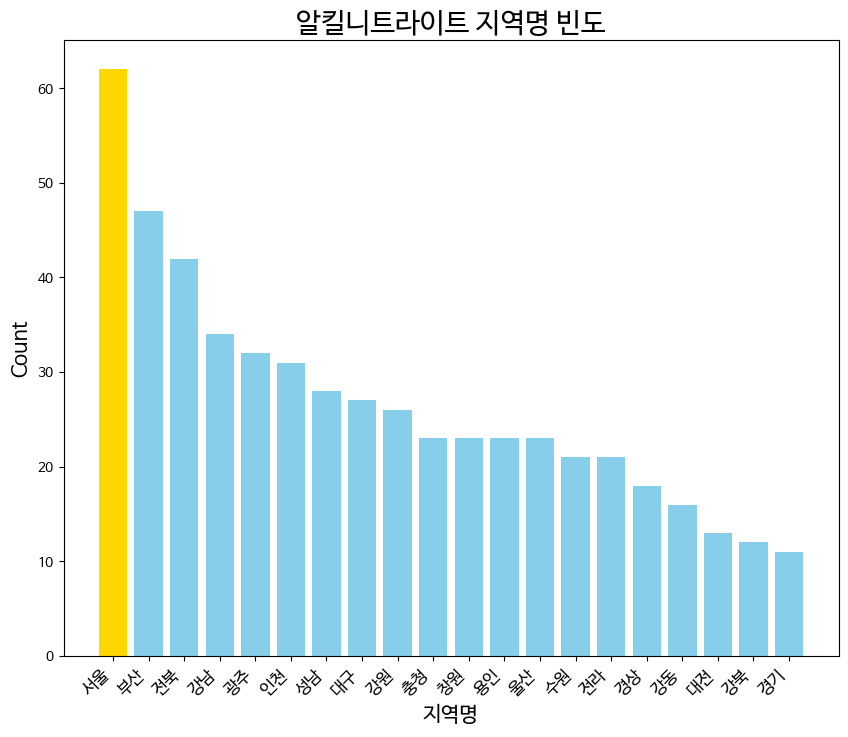

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dscap/data/알킬니트라이트_지역명빈도.csv')
df_sorted = df.sort_values(by='개수', ascending=False)
mean = df['개수'].mean()
df_sorted = df_sorted[df_sorted['개수']>=mean]

max_idx = df_sorted['개수'].to_list().index(max(df_sorted['개수'])) # 가장 큰 값을 가지는 막대의 인덱스를 찾음

colors = ['skyblue'] * len(df_sorted['지역명']) # 기본 색깔
colors[max_idx] = 'gold' # 가장 큰 값을 가지는 막대

# 그래프 그리기
plt.figure(figsize=(10, 8))
plt.bar(df_sorted['지역명'], df_sorted['개수'], color=colors)
plt.title('알킬니트라이트 지역명 빈도', fontsize=20)
plt.xlabel('지역명', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.rc('font', family='NanumBarunGothic')

plt.show()
#plt.savefig('/content/drive/MyDrive/dscap/data_analysis/코카인.png')